In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Don't forget to use `ml_env` environment
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector


In [2]:
pd.set_option('display.max_columns', 90)

def clear_cols(s):
    return s.strip().replace(" ","_")

In [3]:
inpatient_path   = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
outpatient_path  = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Outpatientdata-1542865627584.csv'
train_path       = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
beneficiary_path = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Beneficiarydata-1542865627584.csv'
# path = '/GitHub Projects/MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis'
# /GitHub Projects/MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis
# read inpatient outpatient and train files data
inpatient  = pd.read_csv(inpatient_path).rename(columns=clear_cols)
outpatient = pd.read_csv(outpatient_path).rename(columns=clear_cols)
train      = pd.read_csv(train_path).rename(columns=clear_cols)
bene       = pd.read_csv(beneficiary_path).rename(columns=clear_cols)

In [4]:
train.sample()

,Provider,PotentialFraud
584,PRV51732,No


In [5]:
print(inpatient.shape)
inpatient.sample()

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
37818,BENE149592,CLM58217,2009-07-03,2009-07-12,PRV52281,16000,PHY406880,PHY397781,NaN,2009-07-03,8799,1068.0,2009-07-12,597,70703,452,3572,29620,6823,V8533,11289,138,NaN,NaN,8417.0,9982.0,NaN,NaN,NaN,NaN


In [6]:
print(outpatient.shape)
outpatient.sample()

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
160825,BENE57227,CLM353366,2009-05-11,2009-05-31,PRV55004,30,PHY361670,NaN,PHY354326,41400,V1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
print(bene.shape)
bene.sample()

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
9227,BENE20872,1930-10-01,NaN,2,2,Y,33,520,12,12,1,1,1,2,1,2,1,1,1,1,2,23800,3204,1450,250


In [8]:
df = inpatient.groupby('Provider').agg(
    IPInscClaimAmtReimbursedCount = ('InscClaimAmtReimbursed', 'count'),
    IPInscClaimAmtReimbursedStd = ('InscClaimAmtReimbursed', 'std'),
    IPInscClaimAmtReimbursedMax = ('InscClaimAmtReimbursed', 'max')
).reset_index()
df

,Provider,IPInscClaimAmtReimbursedCount,IPInscClaimAmtReimbursedStd,IPInscClaimAmtReimbursedMax
0,PRV51001,5,18352.111595,42000
1,PRV51003,62,8513.606244,57000
2,PRV51007,3,3511.884584,10000
3,PRV51008,2,12020.815280,21000
4,PRV51011,1,NaN,5000
...,...,...,...,...
2087,PRV57719,4,25350.871122,57000
2088,PRV57728,1,NaN,6000
2089,PRV57729,11,7226.214903,24000
2090,PRV57732,11,4742.458127,17000


In [9]:
print(df.shape)
df.sample()

(2092, 4)


,Provider,IPInscClaimAmtReimbursedCount,IPInscClaimAmtReimbursedStd,IPInscClaimAmtReimbursedMax
320,PRV51816,7,6872.997544,24000


In [10]:
out_df = outpatient.groupby('Provider').agg(
    OPInscClaimAmtReimbursedCount = ('InscClaimAmtReimbursed', 'count'),
    OPInscClaimAmtReimbursedStd = ('InscClaimAmtReimbursed', 'std'),
    OPInscClaimAmtReimbursedMax = ('InscClaimAmtReimbursed', 'max')
).reset_index()
out_df

,Provider,OPInscClaimAmtReimbursedCount,OPInscClaimAmtReimbursedStd,OPInscClaimAmtReimbursedMax
0,PRV51001,20,422.817617,1500
1,PRV51003,70,821.364579,3300
2,PRV51004,149,689.963754,3300
3,PRV51005,1165,491.556392,4080
4,PRV51007,69,447.231657,3300
...,...,...,...,...
5007,PRV57759,28,820.880286,3300
5008,PRV57760,22,309.998254,1100
5009,PRV57761,82,418.366092,2200
5010,PRV57762,1,NaN,1900


In [11]:
provider_claims = pd.merge(
    df,
    out_df,
    on='Provider',
    how='outer',
).fillna(0)

In [12]:
print(provider_claims.shape)
provider_claims.sample(6)

(5410, 7)


,Provider,IPInscClaimAmtReimbursedCount,IPInscClaimAmtReimbursedStd,IPInscClaimAmtReimbursedMax,OPInscClaimAmtReimbursedCount,OPInscClaimAmtReimbursedStd,OPInscClaimAmtReimbursedMax
1722,PRV53148,0.0,0.000000,0.0,15.0,199.899975,600.0
4714,PRV56904,4.0,4082.482905,13000.0,0.0,0.000000,0.0
3301,PRV55141,0.0,0.000000,0.0,2.0,21.213203,60.0
5023,PRV57295,14.0,15509.833818,57000.0,0.0,0.000000,0.0
4433,PRV56546,9.0,9184.830489,29000.0,0.0,0.000000,0.0
2887,PRV54596,0.0,0.000000,0.0,64.0,390.094584,1800.0


In [13]:
provider_claims['Provider'].nunique()

5410

In [14]:
# # Save selected columns to CSV
# provider_claims.to_csv('9 draft.csv', index=False)

In [15]:
# Then merge with fraud labels
final_df = pd.merge(
    provider_claims,
    train[['Provider', 'PotentialFraud']],
    on='Provider',
    how='outer'
)

In [16]:
final_df

,Provider,IPInscClaimAmtReimbursedCount,IPInscClaimAmtReimbursedStd,IPInscClaimAmtReimbursedMax,OPInscClaimAmtReimbursedCount,OPInscClaimAmtReimbursedStd,OPInscClaimAmtReimbursedMax,PotentialFraud
0,PRV51001,5.0,18352.111595,42000.0,20.0,422.817617,1500.0,No
1,PRV51003,62.0,8513.606244,57000.0,70.0,821.364579,3300.0,Yes
2,PRV51004,0.0,0.000000,0.0,149.0,689.963754,3300.0,No
3,PRV51005,0.0,0.000000,0.0,1165.0,491.556392,4080.0,Yes
4,PRV51007,3.0,3511.884584,10000.0,69.0,447.231657,3300.0,No
...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.000000,0.0,28.0,820.880286,3300.0,No
5406,PRV57760,0.0,0.000000,0.0,22.0,309.998254,1100.0,No
5407,PRV57761,0.0,0.000000,0.0,82.0,418.366092,2200.0,No
5408,PRV57762,0.0,0.000000,0.0,1.0,0.000000,1900.0,No


In [17]:
final_df['PotentialFraud'] = final_df['PotentialFraud'].map({'Yes': 1, 'No': 0})
final_df

,Provider,IPInscClaimAmtReimbursedCount,IPInscClaimAmtReimbursedStd,IPInscClaimAmtReimbursedMax,OPInscClaimAmtReimbursedCount,OPInscClaimAmtReimbursedStd,OPInscClaimAmtReimbursedMax,PotentialFraud
0,PRV51001,5.0,18352.111595,42000.0,20.0,422.817617,1500.0,0
1,PRV51003,62.0,8513.606244,57000.0,70.0,821.364579,3300.0,1
2,PRV51004,0.0,0.000000,0.0,149.0,689.963754,3300.0,0
3,PRV51005,0.0,0.000000,0.0,1165.0,491.556392,4080.0,1
4,PRV51007,3.0,3511.884584,10000.0,69.0,447.231657,3300.0,0
...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.000000,0.0,28.0,820.880286,3300.0,0
5406,PRV57760,0.0,0.000000,0.0,22.0,309.998254,1100.0,0
5407,PRV57761,0.0,0.000000,0.0,82.0,418.366092,2200.0,0
5408,PRV57762,0.0,0.000000,0.0,1.0,0.000000,1900.0,0


In [18]:
final_df.columns

Index(['Provider', 'IPInscClaimAmtReimbursedCount',
       'IPInscClaimAmtReimbursedStd', 'IPInscClaimAmtReimbursedMax',
       'OPInscClaimAmtReimbursedCount', 'OPInscClaimAmtReimbursedStd',
       'OPInscClaimAmtReimbursedMax', 'PotentialFraud'],
      dtype='object')

In [19]:
X = final_df[['IPInscClaimAmtReimbursedCount',
       'IPInscClaimAmtReimbursedStd', 'IPInscClaimAmtReimbursedMax',
       'OPInscClaimAmtReimbursedCount', 'OPInscClaimAmtReimbursedStd',
       'OPInscClaimAmtReimbursedMax']]

In [20]:
y = final_df['PotentialFraud']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [22]:
# 2. Scale the features (standardization: mean = 0, std = 1).
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, then transform
X_test = scaler.transform(X_test)  # Transform test data using train's mean & std


In [23]:
# 3. Train a logistic regression model.
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)  # Fit model on training data

LogisticRegression(random_state=42)

In [24]:
# 4. Make predictions on the test set.
y_predict = model.predict(X_test)  # Outputs predicted class labels (0 or 1)
y_proba = model.predict_proba(X_test)[:, 1] # Outputs predicted class labels (0 or 1)


In [25]:
from sklearn.metrics import confusion_matrix
# Assuming y_test contains true labels and y_predict contains predicted labels
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[962  15]
 [ 61  44]]


In [26]:
# flatten the confusion matrix and break it down into four components.
TN, FP, FN, TP = cm.ravel()
# print('Confusion Matrix before manipulating by adding the threshold:\n')

# Calculating metrics
accuracy = accuracy_score(y_test, y_predict) # 2 ways to calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) # Proportion of correct predictions
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.93
Precision: 0.75
Recall: 0.42
F1 Score: 0.54


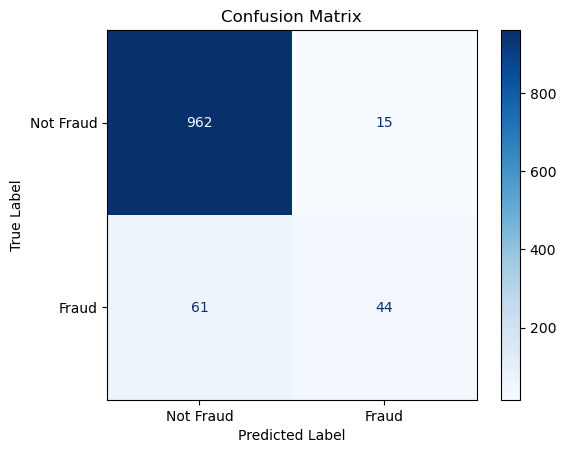

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Compute and display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

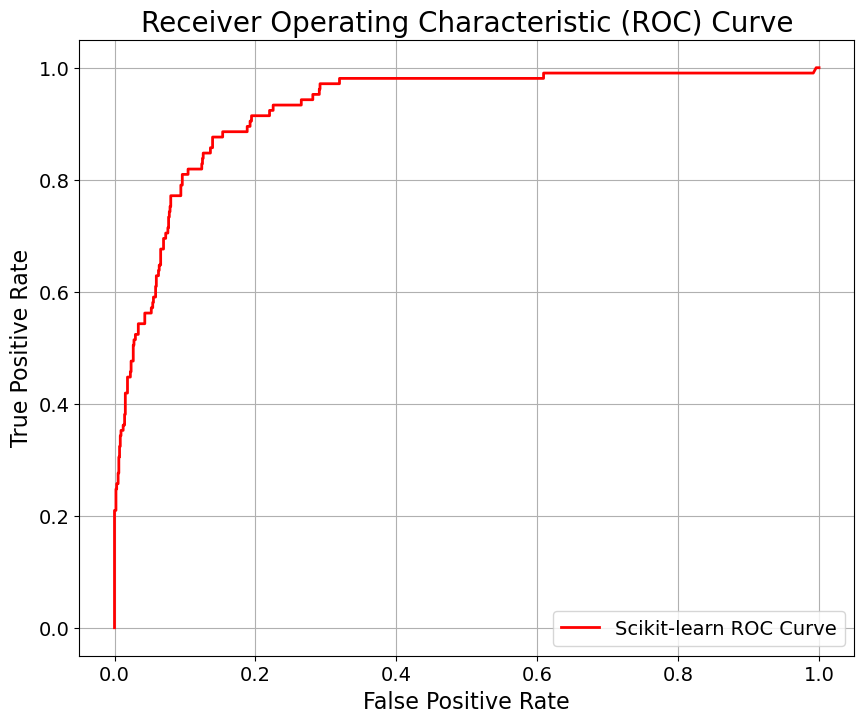

In [28]:
from sklearn.metrics import roc_curve

# Compare with scikit-learn's implementation
# Set up the figure first
fig, ax = plt.subplots(figsize=(10, 8))
# Compare with scikit-learn's implementation
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, 'r-', lw=2, label=f'Scikit-learn ROC Curve') #(AUC = {roc_auc:.2f})')
# Add styling with larger fonts
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)
ax.grid(True)

In [29]:
from sklearn.metrics import auc
# Area Under Curve
auc(fpr, tpr)

np.float64(0.9278646975678706)

# Apply cross validation

In [30]:
from sklearn.model_selection import cross_val_score

# Define Logistic Regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter for convergence

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean auc_roc: {cv_scores.mean():.4f}")


Cross-validation scores: [0.95004088 0.93966553 0.92269961 0.93075867 0.93091236]
Mean auc_roc: 0.9348


## Hyperparameter Tuning Using `GridSearchCV`

Checking for the best paramters that will gives the best result in the scoring parameter

In [31]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support L1 & L2
}

# Define logistic regression model
logreg = LogisticRegression(max_iter=10000)

# Perform GridSearchCV optimizing for roc_auc
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters and roc_auc score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best roc_auc Score: {grid_search.best_score_:.4f}")


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best roc_auc Score: 0.9363


In [32]:
from sklearn.metrics import classification_report

# Get the best trained model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
report = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
print(report)


              precision    recall  f1-score   support

   Not Fraud       0.94      0.99      0.96       977
       Fraud       0.77      0.39      0.52       105

    accuracy                           0.93      1082
   macro avg       0.86      0.69      0.74      1082
weighted avg       0.92      0.93      0.92      1082



In [33]:
cm = confusion_matrix(y_test, y_pred)

print("confusion Matrix after GridSearch only:\n",cm)

confusion Matrix after GridSearch only:
 [[965  12]
 [ 64  41]]


# <center>SMOTE

In [34]:
# Checks how the data looks like, before applying a new concept (SMOTE)
final_df.head()

,Provider,IPInscClaimAmtReimbursedCount,IPInscClaimAmtReimbursedStd,IPInscClaimAmtReimbursedMax,OPInscClaimAmtReimbursedCount,OPInscClaimAmtReimbursedStd,OPInscClaimAmtReimbursedMax,PotentialFraud
0,PRV51001,5.0,18352.111595,42000.0,20.0,422.817617,1500.0,0
1,PRV51003,62.0,8513.606244,57000.0,70.0,821.364579,3300.0,1
2,PRV51004,0.0,0.000000,0.0,149.0,689.963754,3300.0,0
3,PRV51005,0.0,0.000000,0.0,1165.0,491.556392,4080.0,1
4,PRV51007,3.0,3511.884584,10000.0,69.0,447.231657,3300.0,0


In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = final_df.drop(columns=['Provider','PotentialFraud'])
y = final_df['PotentialFraud']

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: PotentialFraud
0    3923
1     405
Name: count, dtype: int64
After SMOTE: PotentialFraud
0    3923
1    3923
Name: count, dtype: int64


/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [36]:
model_after_smote = LogisticRegression(max_iter=10000)
model_after_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=10000)

In [37]:
from sklearn.metrics import classification_report

# Predict on the test set (original imbalanced data)
y_pred = model_after_smote.predict(X_test)
y_proba = model_after_smote.predict_proba(X_test)[:, 1] # predict probabilities, what's closer to 0 or 1.


In [38]:
from sklearn.metrics import confusion_matrix
# Assuming y_test contains true labels and y_predict contains predicted labels
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[858 123]
 [ 17  84]]


In [39]:
# cm = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix smote:\n', cm)

# flatten the confusion matrix and break it down into four components.
TN, FP, FN, TP = cm.ravel()
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred) # 2 ways to calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) # Proportion of correct predictions
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.87
Precision: 0.41
Recall: 0.83
F1 Score: 0.55


### <center>SMOTE AUC_ROC score:

In [40]:
from sklearn.metrics import roc_auc_score

y_proba = model_after_smote.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (fraud)
auc_score = roc_auc_score(y_test, y_proba)

print(f"ROC-AUC Score: {auc_score:.4f}")


ROC-AUC Score: 0.9471


# <center>Grid Search CV
<center>This comes after the smote, so I run the grid search over the smote results

In [41]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']
}

# Use GridSearchCV to optimize for recall
grid_search = GridSearchCV(model_after_smote, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [42]:
from sklearn.metrics import roc_auc_score

y_proba = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (fraud)
auc_score = roc_auc_score(y_test, y_proba)

print(f"ROC-AUC Score for the GridSearchCV over the SMOTE: {auc_score:.4f}")


ROC-AUC Score for the GridSearchCV over the SMOTE: 0.9476


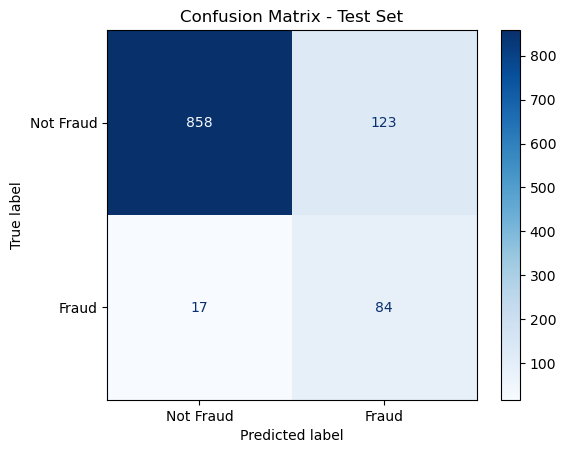

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()


In [44]:
from sklearn.metrics import confusion_matrix
# Assuming y_test contains true labels and y_predict contains predicted labels
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[858 123]
 [ 17  84]]


In [45]:
# flatten the confusion matrix and break it down into four components.
TN, FP, FN, TP = cm.ravel()
print('Confusion Matrix before manipulating by adding the threshold:\n')
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred) # 2 ways to calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) # Proportion of correct predictions
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Confusion Matrix before manipulating by adding the threshold:

Accuracy: 0.87
Precision: 0.41
Recall: 0.83
F1 Score: 0.55
